# Medical Data Visualizer

In [32]:
import pandas as pd

# Import data
df = pd.read_csv('csv/medical_examination.csv')

# Calculate BMI and create a new column for overweight status
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

# Convert cholesterol and glucose columns to binary (0 or 1)
df['cholesterol'] = (df['cholesterol'] != 1).astype(int)
df['gluc'] = (df['gluc'] != 1).astype(int)

# Display the first five rows of the DataFrame
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


AttributeError: 'FacetGrid' object has no attribute 'set_xlabel'

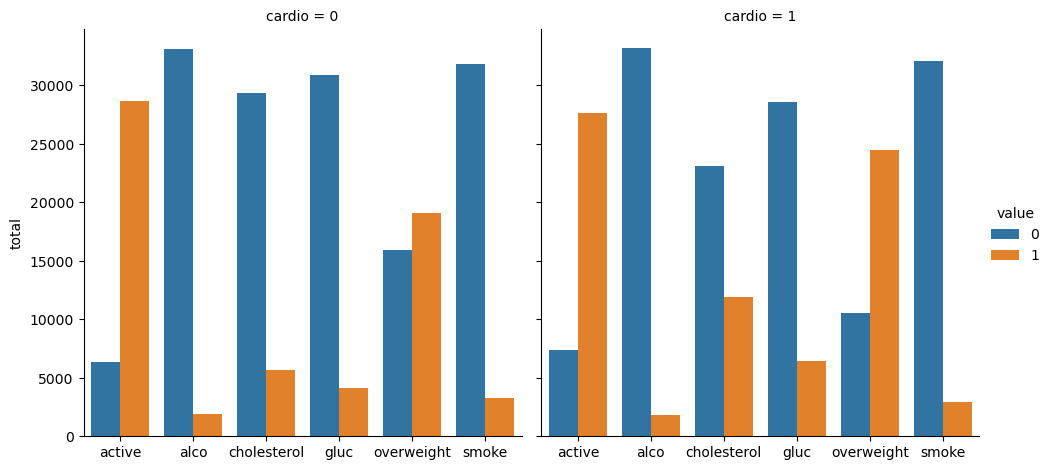

In [49]:
df_cat = pd.melt(df, id_vars = 'cardio', 
                 value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
                 value_name='value')

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

# Draw the catplot with 'sns.catplot()'
catplot = sns.catplot(data=df_cat, x='variable', y='size', col='cardio', kind='bar', hue='value')
catplot.set_axis_labels("", "total")
catplot.set_xlabel("variable")

# Get the figure for the output
fig = catplot.fig


<Axes: >

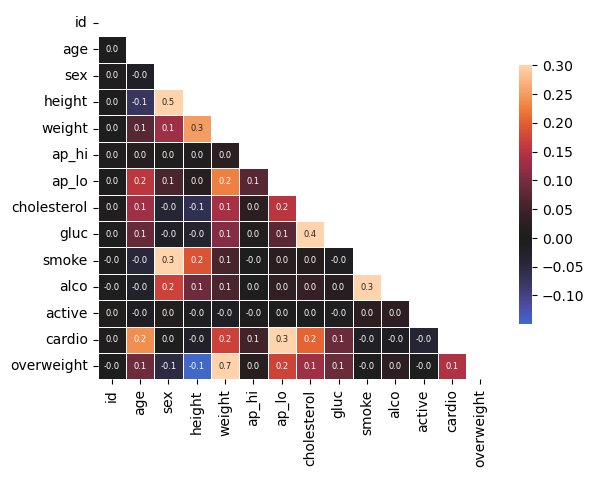

In [40]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(data=corr, annot=True, fmt=".1f", linewidth=.5, mask=mask, annot_kws={'fontsize': 6},
            cbar_kws={"shrink": .7}, square=False, center=0, vmax=0.30)